<a href="https://colab.research.google.com/github/1047gyu/quantum/blob/main/Project1_Quantum_Tunneling_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1. Quantum Tunneling Simulation
This Colabs will let you tweak the wavefunctions and potential barrier and simulate how probability distribution evolves through time.  
Using this tool, please solve the given problem in the homework and submit until
the deadline.

---

### Import relevant libraries
For this project, you need numpy and matplotlib libraries.
You do not need to know how to use them.
Just run the below code cell.

In [ ]:
import numpy as np #library for matrix calculation
from matplotlib import pyplot as plt #library for plotting
from matplotlib import animation #library for making animation
from IPython.display import HTML #library for animation export through browser

### Initial Wavepacket
Change the parameters to shape and plot your initial wavepacket.

In [ ]:
x0 = -5 # in nm. Average position of initial wavepacket.
k0 = 2 # in nm^{-1}. Average wavenumber of initial wavepacket.
sig = 1 # in nm. Spread of the initial wavepacket.
t = 60 # in fs. Total time to compute.

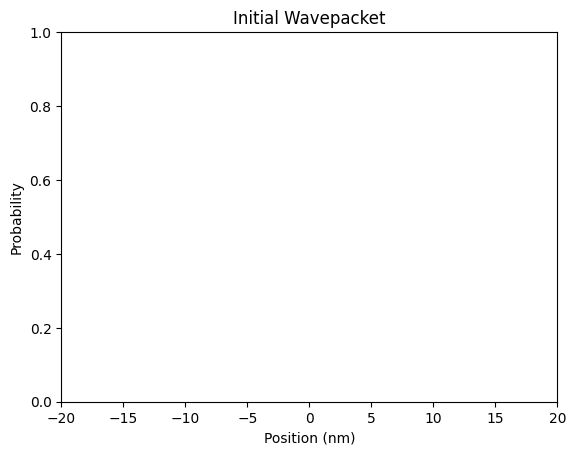

In [ ]:
#@title Plot initial wavepacket
XX = np.linspace(-70, 70, 1401) # X range. Do not change.
N = XX.size

figW, axW = plt.subplots()
psi0 = np.exp(1j * k0 * XX)/((2 * np.pi * sig**2)**(1/4)) * np.exp(-(XX - x0)**2 / (4 * sig**2))


#axW.plot(XX, ? )


axW.set_xlabel("Position (nm)")
axW.set_ylabel("Probability")
axW.set_title("Initial Wavepacket")
axW.axis([-20, 20, 0, 1])
plt.show()

### Potential Barrier height
Potential barrier `V` is scaled by the average energy of Gaussian wavepacket.  
Thus, a number 2 in `V` is equal to 2 times average energy in the actual simulation.

In [ ]:
Vwidth = 1 # in nm
Vheight = [1,2,4,8] # in E_{avg} of the wavepacket

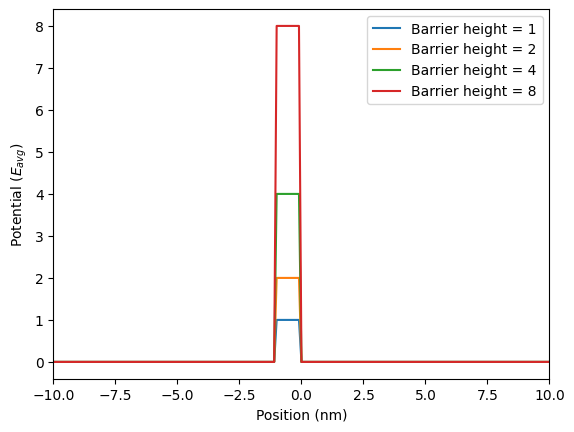

In [ ]:
#@title Plot potential barrier
w = int(np.ceil(Vwidth * 10)) # Do not change

# Potential barrier
Vn = [np.zeros(N) for i in range(len(Vheight))]; # Initialization
for i,height in enumerate(Vheight):
  Vn[i][700-w:700] = height # Change this value to scale potential energy up or down

# Plotting V. Do not change.
figV, axV = plt.subplots(1,1)
for i,height in enumerate(Vheight):
  axV.plot(XX, Vn[i], label = f'Barrier height = {height}')
axV.set_xlabel("Position (nm)")
axV.set_ylabel("Potential ($E_{avg}$)")
axV.set_xlim([-10,10])
axV.legend()

plt.show()

### Compute Time evolution
Following code cells evolve the initial wavepacket using time-dependent Schrodinger Equation
and Crank-Nicolson formalism.

You don't have to understand the following code.
Just run the code and get the result.  
It will take around a minute for the video to be rendered.

In [ ]:
# @title Compute wavefunction at each time and convert it to HTML video

#me = ? # electron mass
#hbar = ? # hbar
#Eavg = ? # Average Energy of Gaussian Wavepacket


Vm = Vn
dx = .1 # in nm
dt = .3*((me * dx)/(hbar * k0)) # in as (1e-18 s)
for i in range(len(Vn)):
  Vm[i] = Eavg * Vn[i]
Nt = int(np.ceil(t*1000/dt))

# Initial gaussian wavepacket
psi0 = np.exp(1j * k0 * XX)/((2 * np.pi * sig**2)**(1/4)) * np.exp(-(XX - x0)**2 / (4 * sig**2))
alpha = 1j * hbar * dt/ (2*me* dx**2)

# Crank-Nicolson Matrix
A, B, C = [], [], []
for i in range(len(Vn)):
  A.append(np.diag(2 + 2*alpha + 1j*dt*Vm[i]/hbar) - np.diag(alpha * np.ones(N-1), 1) - np.diag(alpha * np.ones(N-1), -1))
  B.append(np.diag(2 - 2*alpha - 1j*dt*Vm[i]/hbar) + np.diag(alpha * np.ones(N-1), 1) + np.diag(alpha * np.ones(N-1), -1))
  C.append(np.linalg.solve(A[i],B[i]))


psi = [psi0 for i in range(len(Vn))]

Time = 0
def evolve():
    global psi, Time
    for i in range(len(Vn)):
      psi[i] = C[i] @ psi[i]
    Time +=1
    return psi

def update(data):
    for i in range(len(Vn)):
      wf_plot[i].set_data(XX,np.absolute(data[i])**2)
    axW.set_title(f't = {(Time*dt)/1000:0.2f} fs')
    return

def data_gen():
    while True:
        yield evolve()

figW, axW = plt.subplots()
axW.axis([-5, 20, 0, 0.5])
axW.set_title('t = 0 fs')
axW.set_xlabel("Position (nm)")
axW.set_ylabel("Probability")

wf_plot = []
for i,height in enumerate(Vheight):
    wf_plot.append(axW.plot(XX, np.absolute(psi[i])**2, label = f'Height = {height}')[0])
axW.legend()

ani = animation.FuncAnimation(figW, update, data_gen, interval = 30, save_count = Nt)

html = HTML(ani.to_html5_video())
display(html)
plt.close()

NameError: name 'me' is not defined

### Computing probability amplitude at specific time
Above code cell creates a whole video of probability ampltidue evolving, which takes a bit of time.  
Instead, the folowing code cell plots the snapshot of probability amplitude at a given time `tMax` for varying potential and width.  
It will take about 20-30 seconds to finish the code.  
Use the following code to solve problem 2 in your homework.

In [ ]:
tMax = 40 # in fs. Time at which probability amplitude is calculated.

# Potential Barrier Setup
# You may put a list of potential height & width you wish to calculate
# the probability amplitude.
# The code will iterate through all the heights and widths you give
# and plot the PDF in xrange [0,20].
Vheight = [1, 2, 4, 8] # Will be scaled by E_avg.
Vwidth = [1.5]

ylim = [0, 0.2] # Set y-axis limit of your plot here

In [ ]:
#@title Plot probability amplitude at t = `tMax`
# The following for loop computes wavefunction at time = t
# for each Vheight and Vwidth.
# You do not have to change the loop below.
NtMax = int(np.ceil(tMax * 1000/dt)) # Total time steps. Do not change.

# Potential barrier
Vt = [[np.zeros(N) for j in range(len(Vwidth))] for i in range(len(Vheight))]; # Initialization
for i,height in enumerate(Vheight):
  for j,width in enumerate(Vwidth):
    w = int(np.ceil(width * 10))
    Vt[i][j][700-w:700] = height*Eavg

# Crank-Nicolson Matrix
A, B, C = [], [], []
for i in range(len(Vheight)):
  A.append([])
  B.append([])
  C.append([])
  for j in range(len(Vwidth)):
    E = np.diag(2 + 2*alpha + 1j*dt*Vt[i][j]/hbar) - np.diag(alpha * np.ones(N-1), 1) - np.diag(alpha * np.ones(N-1), -1)
    A[i].append(np.diag(2 + 2*alpha + 1j*dt*Vt[i][j]/hbar) - np.diag(alpha * np.ones(N-1), 1) - np.diag(alpha * np.ones(N-1), -1))
    B[i].append(np.diag(2 - 2*alpha - 1j*dt*Vt[i][j]/hbar) + np.diag(alpha * np.ones(N-1), 1) + np.diag(alpha * np.ones(N-1), -1))
    C[i].append(np.linalg.solve(A[i][j],B[i][j]))

# Numerical calculation
psi = [[psi0 for j in range(len(Vwidth))] for i in range(len(Vheight))]
for Nt in range(NtMax):
  for i in range(len(Vheight)):
    for j in range(len(Vwidth)):
      psi[i][j] = C[i][j] @ psi[i][j]

# Plotting happens here
fig, ax = plt.subplots()
ax.set_xlim([0, 20])
ax.set_ylim(ylim)
ax.set_xlabel('Position (nm)')
ax.set_ylabel('Probability')
ax.set_title(f'Probability amplitude at t = {tMax} fs')
for i, height in enumerate(Vheight):
  for j, width in enumerate(Vwidth):
    ax.plot(XX, np.absolute(psi[i][j]**2), label = f'Height = {height}$E_{{avg}}$, Width = {width} nm')
ax.legend()

plt.show()

NameError: name 'dt' is not defined

### Using abitrarily-shaped potential
Until now, we've only dealt with rectangular potential barrier.  
But our calculation works just fine with potential of any shape.  
Build your own potential, then plot the probability amplitude at certain time t = 40 fs.  
Use the following code blocks to solve problem 3 in your homework (optional).

Build and plot potential in the following code block.
Potential V ranges from -70 nm to 70 nm,
but to prevent boundary condition from taking effect,
build potential only in the range of -20 nm to 20 nm.  
The potential is discretized in the interval of 0.1 nm.
For example, `V[0]` is your potential height at x = -70 nm,
`V[1]` is the potential at x = -69.9 nm, and so on until
`V[1400]` reaches potential at x = 70.0 nm.  
Thus, you must build your potential in the range of `V[500]` (at x = -20 nm) to `V[900]` (at x = 20 nm) only.


---

**Hint**  
Use `np.arange(start, end, incr)` to make a linearly varying profile from `start` to `end` (not included) in the increment of `incr`.  
Use `np.linspace(start, end, n)` to make a linearly varying profile from `start` to `end` (inclusive) with `n` points.  
Use `np.ones(n)` to make a flat profile with `n` points.  
For more information, please refer to [NumPy official documentation](https://numpy.org/doc/stable/reference/index.html).

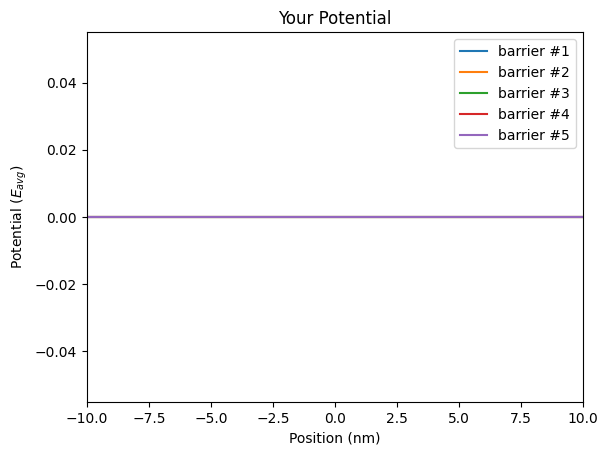

In [ ]:
## Build your Potential Here ##
V = [np.zeros(N) for i in range(5)] # Initialization

# ?

# Plotting V happens here
figV, axV = plt.subplots()
axV.set_title('Your Potential')
axV.set_xlabel('Position (nm)')
axV.set_ylabel('Potential ($E_{avg}$)')
axV.set_xlim([-10, 10]) # change here to set x range of graph
for i,Vi in enumerate(V):
  axV.plot(XX, Vi, label = f'barrier #{i+1}')

axV.legend()
plt.show()

In [ ]:
# @title Plot probability amplitude at t = 40 fs
tMax = 40
NtMax = int(np.ceil(tMax * 1000/dt))

# Initial gaussian wavepacket
psi0 = np.exp(1j * k0 * XX)/((2 * np.pi * sig**2)**(1/4)) * np.exp(-(XX - x0)**2 / (4 * sig**2))
alpha = 1j * hbar * dt/ (2*me* dx**2)

# Crank-Nicolson Matrix
A, B, C = [], [], []
for i in range(len(V)):
  V[i] = V[i] * Eavg
  A.append(np.diag(2 + 2*alpha + 1j*dt*V[i]/hbar) - np.diag(alpha * np.ones(N-1), 1) - np.diag(alpha * np.ones(N-1), -1))
  B.append(np.diag(2 - 2*alpha - 1j*dt*V[i]/hbar) + np.diag(alpha * np.ones(N-1), 1) + np.diag(alpha * np.ones(N-1), -1))
  C.append(np.linalg.solve(A[i],B[i]))

# Numerical calculation
psi = [psi0 for j in range(len(V))]
for Nt in range(NtMax):
  for i in range(len(V)):
    psi[i] = C[i] @ psi[i]

# Plotting happens here
fig, ax = plt.subplots()
ax.axis([0, 20, 0, 0.15]) # Change the axis limit here
ax.set_xlabel('Position (nm)')
ax.set_ylabel('Probability')
ax.set_title(f'Probability amplitude at t = {tMax} fs')

for i, Vi in enumerate(V):
    ax.plot(XX, np.absolute(psi[i]**2), label = f'barrier #{i+1}')

ax.legend()
plt.show()

NameError: name 'dt' is not defined